# Excercise 5

We will be using the SF Salaries Dataset from Kaggle! Just follow along and complete the tasks below. The tasks will get harder and harder as you go along.

Import pandas as pd.

Read Salaries.csv as a dataframe called sal.

Check the head of the DataFrame.

**1st** problem

In [1]:
import pandas as pd
sal = pd.read_csv('Salaries.csv')
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [2]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


What is the average BasePay?



In [3]:
sal["BasePay"].mean()

66325.44884050643

What is the highest amount of OvertimePay in the dataset ?



In [4]:
sal['OvertimePay'].max()

245131.88

What is the job title of JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn’t match up (there is also a lowercase Joseph Driscoll).



In [5]:
sal.loc[sal['EmployeeName'] == 'JOSEPH DRISCOLL'].JobTitle

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

How much does JOSEPH DRISCOLL make (including benefits)?



In [6]:
sal.loc[sal['EmployeeName'] == 'JOSEPH DRISCOLL'].TotalPayBenefits

24    270324.91
Name: TotalPayBenefits, dtype: float64

What is the name of highest paid person (including benefits)?



In [7]:
sal.loc[sal['TotalPayBenefits'].idxmax()]

Id                                                               1
EmployeeName                                        NATHANIEL FORD
JobTitle            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay                                                     167411
OvertimePay                                                      0
OtherPay                                                    400184
Benefits                                                       NaN
TotalPay                                                    567595
TotalPayBenefits                                            567595
Year                                                          2011
Notes                                                          NaN
Agency                                               San Francisco
Status                                                         NaN
Name: 0, dtype: object

What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?



In [8]:
sal.loc[sal['TotalPayBenefits'].idxmin()]

Id                                      148654
EmployeeName                         Joe Lopez
JobTitle            Counselor, Log Cabin Ranch
BasePay                                      0
OvertimePay                                  0
OtherPay                               -618.13
Benefits                                     0
TotalPay                               -618.13
TotalPayBenefits                       -618.13
Year                                      2014
Notes                                      NaN
Agency                           San Francisco
Status                                     NaN
Name: 148653, dtype: object

What was the average (mean) BasePay of all employees per year? (2011-2014)?



In [9]:
sal.groupby(['Year'])['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

How many unique job titles are there?



In [10]:
sal.head()
sal.JobTitle.nunique()

2159

What are the top 5 most common jobs?

In [11]:
sal.JobTitle.value_counts()[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)



In [12]:
sum(sal[sal['Year'] == 2013]['JobTitle'].value_counts() == 1)

202

How many people have the word Chief in their job title? (This is pretty tricky)



In [13]:
sal.JobTitle.str.count('Chief').sum()

423

Is there a correlation between length of the Job Title string and Salary?

In [14]:
sal['title_len'] = sal['JobTitle'].apply(len)
sal[['TotalPayBenefits', 'title_len']].corr()

,TotalPayBenefits,title_len
TotalPayBenefits,1.000000,-0.036878
title_len,-0.036878,1.000000


Generate a histogram plot of base salary with 30 bins?



In [15]:
import seaborn as sns
import numpy as np

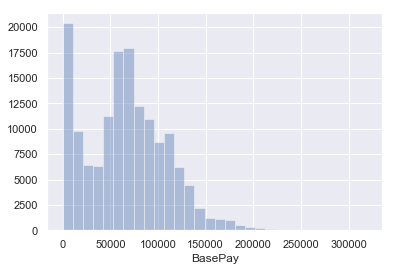

In [16]:
sns.set()
sal['BasePay'] = np.nan_to_num(sal['BasePay'])
ax = sns.distplot(sal["BasePay"], bins=30, kde=False)